In [17]:
import pandas as pd
import torch
from torch import nn
from torch.nn import functional as F
import warnings
import sys
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
warnings.filterwarnings('ignore')


class SoftmaxRegression(d2l.Classifier):
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                  nn.LazyLinear(num_outputs))
        
    def forward(self, X):
        return self.net(X)
    
    def loss(self, y_hat, y, averaged=True):
        y_hat = y_hat.reshape((-1, y_hat.shape[-1]))
        y = y.reshape((-1,))
        return F.cross_entropy(y_hat, y, reduction='mean' 
                               if averaged else 'none')

(105.10649853944778, 19.00413277745247)

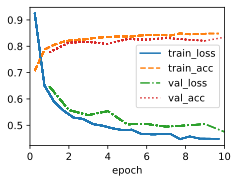

In [13]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

# 4.5.5. Exercises

## 1. Deep learning uses many different number formats, including FP64 double precision (used extremely rarely), FP32 single precision, BFLOAT16 (good for compressed representations), FP16 (very unstable), TF32 (a new format from NVIDIA), and INT8. Compute the smallest and largest argument of the exponential function for which the result does not lead to numerical underflow or overflow.

| Number Format    | Smallest Argument           | Largest Argument           |
|------------------|-----------------------------|----------------------------|
| FP64 Double Precision | $-\log(\text{MAX_FP64})$| $\log(\text{MAX_FP64})$  |
| FP32 Single Precision | $-\log(\text{MAX_FP32})$ | $ \log(\text{MAX_FP32})$ |
| BFLOAT16          | $-\log(\text{MAX_BFLOAT16})$ |$\log(\text{MAX_BFLOAT16})$ |
| FP16 Half Precision | $-\log(\text{MAX_FP16})$ | $ \log(\text{MAX_FP16})$  |
| TF32              | $-\log(\text{MAX_TF32})$|$\log(\text{MAX_TF32})$|
| INT8              | N/A (integer format)        | N/A (integer format)       |

In the table above, $\text{MAX_FP64}$, $\text{MAX_FP32}$, $\text{MAX_BFLOAT16}$, $\text{MAX_FP16}$, and $\text{MAX_TF32}$ represent the largest finite values that can be represented in each respective number format. The values are determined by the specific characteristics of the floating-point representation on the hardware and software platform. Keep in mind that these values are approximations and can vary based on the specific implementation.

In [41]:
import numpy as np
def get_type_exp_min_max(t, flag):
    if t == torch.int8:
        return torch.iinfo(t).max if flag else torch.iinfo(t).min
    return torch.finfo(t).max if flag else torch.finfo(t).min


df = pd.DataFrame({'format':
                   [torch.float64, torch.float32,
                    torch.bfloat16, torch.float16, torch.int8]})
df['format_min'] = df['format'].apply(lambda x:
                                      get_type_exp_min_max(x, False))
df['format_max'] = df['format'].apply(lambda x:
                                      get_type_exp_min_max(x, True))
df['exp_max'] = np.log(df['format_max'])
df['exp_min'] = 
df

,format,format_min,format_max,exp_max,test_max
0,torch.float64,-1.797693e+308,1.797693e+308,709.782713,1.797693e+308
1,torch.float32,-3.402823e+38,3.402823e+38,88.722839,3.402823e+38
2,torch.bfloat16,-3.389531e+38,3.389531e+38,88.718925,3.389531e+38
3,torch.float16,-6.550400e+04,6.550400e+04,11.089866,6.550400e+04
4,torch.int8,-1.280000e+02,1.270000e+02,4.844187,1.270000e+02


In [38]:
df.dtypes

format         object
format_min    float64
format_max    float64
exp_max       float64
test_max      float64
dtype: object

In [31]:
import numpy as np
np.log(2)

0.6931471805599453

## 2. INT8 is a very limited format consisting of nonzero numbers from 1 to 255. How could you extend its dynamic range without using more bits? Do standard multiplication and addition still work?

## 3. Increase the number of epochs for training. Why might the validation accuracy decrease after a while? How could we fix this?

## 4. What happens as you increase the learning rate? Compare the loss curves for several learning rates. Which one works better? When?

In [5]:
batches = d2l.gen_logrithm_nums(initial_value=1, growth_factor=2,
                                num_elements=12)
batches

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]